In [171]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline

In [207]:
sdata = pd.read_csv('signal-data.csv')

In [208]:
sdata.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [209]:
sdata.rename(columns={"Pass/Fail": "result"}, inplace=True)

In [210]:
sdata.shape

(1567, 592)

In [211]:
sdata.dtypes

Time       object
0         float64
1         float64
2         float64
3         float64
           ...   
586       float64
587       float64
588       float64
589       float64
result      int64
Length: 592, dtype: object

In [212]:
sdata.isna().sum()

Time       0
0          6
1          7
2         14
3         14
          ..
586        1
587        1
588        1
589        1
result     0
Length: 592, dtype: int64

In [213]:
numeric_cols = sdata.select_dtypes([np.int64, np.float64]).columns
impute = SimpleImputer(missing_values=np.nan, strategy='median')
sdata[numeric_cols] = impute.fit_transform(sdata[numeric_cols])

In [214]:
sdata.isna().sum()

Time      0
0         0
1         0
2         0
3         0
         ..
586       0
587       0
588       0
589       0
result    0
Length: 592, dtype: int64

In [215]:
#There are no invalid characters other than numeric
sdata[~sdata.applymap(np.isreal).all(1)]

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,result
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,72.2889,0.5005,0.0118,0.0035,2.3630,0.0205,0.0148,0.0046,71.9005,-1.0
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1.0
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1.0
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1.0
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,72.2889,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1.0
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,72.2889,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1.0
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.4616,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1.0
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1.0


In [216]:
sdata = sdata.drop(columns=['Time'])

In [218]:
X = sdata.drop(columns=['result']).copy()
y = sdata['result']

In [219]:
##Remove outliers if any
#sdata = sdata.copy()
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
# Replace every outlier on the lower side by the lower whisker
for i, j in zip(np.where(X < Q1 - 1.5 * IQR)[0], np.where(X < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    X.iloc[i,j] = whisker[j]
    
    
#Replace every outlier on the upper side by the upper whisker    
for i, j in zip(np.where(X > Q3 + 1.5 * IQR)[0], np.where(X > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    X.iloc[i,j] = whisker[j]

In [220]:
##Check for target imbalance
sdata.groupby(["result"]).count()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
result,,,,,,,,,,,,,,,,,,,,,
-1.0,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,...,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463
1.0,104,104,104,104,104,104,104,104,104,104,...,104,104,104,104,104,104,104,104,104,104


We have a imbalanced dataset, having pass values less than 10% value count than failed values.

In [221]:
print("Before UpSampling, counts of label '-1': {}".format(sum(sdata['result']==-1)))
print("Before UpSampling, counts of label '1': {} \n".format(sum(sdata['result']==1)))

Before UpSampling, counts of label '-1': 1463
Before UpSampling, counts of label '1': 104 



In [222]:
from imblearn.over_sampling import SMOTE

In [223]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
over = SMOTE(sampling_strategy=0.5) #create 50% extra datapoints of majority class so 104+0.5*1463=~835
under = RandomUnderSampler(sampling_strategy=0.8) #reduce from the majority class to match data points 50% more than the minority class
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X_bal, y_bal = pipeline.fit_resample(X, y)

In [224]:
print("Balanced dataset:")
print("After Up and down Sampling, counts of label '-1': {}".format(sum(y_bal==-1)))
print("After Up and down Sampling, counts of label '1': {} \n".format(sum(y_bal==1)))

Balanced dataset:
After Up and down Sampling, counts of label '-1': 913
After Up and down Sampling, counts of label '1': 731 



In [225]:
train_size = 0.8
test_valid_split_size = 0.5 #the test-validation is split into equal parts of the remaining 20%
X_train,X_rem,y_train,y_rem = train_test_split(X_bal,y_bal,train_size=train_size)

In [226]:
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem,train_size=test_valid_split_size)

In [227]:
print(f"X_train : {X_train.shape}"), print(f"y_train : {y_train.shape}")
print(f"X_valid : {X_valid.shape}"), print(f"y_valid : {y_valid.shape}")
print(f"X_test: {X_test.shape}"), print(f"y_test : {y_test.shape}")

X_train : (1315, 590)
y_train : (1315,)
X_valid : (164, 590)
y_valid : (164,)
X_test: (165, 590)
y_test : (165,)


(None, None)

#####  Baseline

In [228]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
scr = clf.score(X_test, y_test)
print(f"Accuracy {scr}")

Accuracy 0.9939393939393939


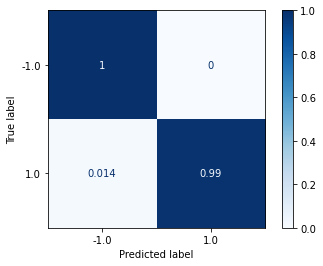

In [229]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues,normalize='true');
plt.grid(False)

In [230]:
from sklearn.model_selection import cross_val_score

Apply 5-fold cv to the SVC classifier

In [231]:
# apply five fold cross validations
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.96 accuracy with a standard deviation of 0.01


In [232]:
#apply looc to SVC classifier
from sklearn.model_selection import LeaveOneOut
looc = LeaveOneOut()
scores = cross_val_score(clf, X_train, y_train, cv=looc)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.98 accuracy with a standard deviation of 0.15


In [233]:
from sklearn.model_selection import GridSearchCV

Let's try applying PCA along with the scaling and SVC algm

In [234]:
pca = PCA()
svc = SVC(gamma='auto')
pipe = Pipeline(steps=[('pca',pca),('scale',StandardScaler()), ('svc', svc)])


In [235]:
param_grid = {
    'pca__n_components':[5,10,20],
    'svc__C':[0.4,0.6, 1]
}

Fit the steps into a pipe and perform hyper-param tuning on validation set using grid-search...

In [236]:
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_valid, y_valid)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.799):
{'pca__n_components': 20, 'svc__C': 1}


In [237]:
scr = search.score(X_test, y_test)
print(f"Accuracy {scr}")

Accuracy 0.7696969696969697


Applying an alternative algm classifier such as logistic regression and perform hyper-param tuning

In [238]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(random_state=10).fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [239]:
log_clf.score(X_valid, y_valid)

0.7378048780487805

In [240]:
logRegClsPipe = Pipeline(steps=[('scale',StandardScaler()), ('log_clf', LogisticRegression())])
log_param_grid = {
'log_clf__C':[0.4,0.6, 1],
'log_clf__penalty':['l1','l2','elasticnet'],
}
log_GS = GridSearchCV(logRegClsPipe, log_param_grid, n_jobs=-1)
log_GS.fit(X_valid, y_valid)
print("Best parameter (CV score=%0.3f):" % log_GS.best_score_)
print(log_GS.best_params_)

Best parameter (CV score=0.744):
{'log_clf__C': 0.4, 'log_clf__penalty': 'l2'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.74431818        nan        nan 0.74431818        nan
        nan 0.74431818        nan]
  warnings.warn(


In [241]:
log_GS.score(X_test,y_test)

0.806060606060606

Lets try applying  the NB classifier

In [242]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()

In [243]:
nbClfPipe = Pipeline(steps=[('scale',StandardScaler()), ('nb_clf', nb_clf)])
nb_param_grid = {
'nb_clf__var_smoothing':[0.004,1e-5, 1e-09],
}
nb_GS = GridSearchCV(nbClfPipe, nb_param_grid, n_jobs=-1)
nb_GS.fit(X_valid, y_valid)
print("Best parameter (CV score=%0.3f):" % nb_GS.best_score_)
print(nb_GS.best_params_)
print(f"NB Score: {nb_GS.score(X_test,y_test)}")

Best parameter (CV score=0.841):
{'nb_clf__var_smoothing': 0.004}
NB Score: 0.8909090909090909


In [244]:
from sklearn.metrics import classification_report

In [245]:
SVC_y_pred = clf.predict(X_test)
print(classification_report(y_test, SVC_y_pred, labels=[-1,1]))

              precision    recall  f1-score   support

          -1       0.99      1.00      0.99        93
           1       1.00      0.99      0.99        72

    accuracy                           0.99       165
   macro avg       0.99      0.99      0.99       165
weighted avg       0.99      0.99      0.99       165



In [246]:
pca_SVC_y_pred = search.predict(X_test)
print(classification_report(y_test, pca_SVC_y_pred, labels=[-1,1]))

              precision    recall  f1-score   support

          -1       0.76      0.86      0.81        93
           1       0.78      0.65      0.71        72

    accuracy                           0.77       165
   macro avg       0.77      0.76      0.76       165
weighted avg       0.77      0.77      0.77       165



In [247]:
logCLF_y_pred = log_GS.predict(X_test)

In [248]:
print(classification_report(y_test, logCLF_y_pred, labels=[-1,1]))

              precision    recall  f1-score   support

          -1       0.83      0.83      0.83        93
           1       0.78      0.78      0.78        72

    accuracy                           0.81       165
   macro avg       0.80      0.80      0.80       165
weighted avg       0.81      0.81      0.81       165



In [249]:
NBCLF_y_pred = nb_GS.predict(X_test)
print(classification_report(y_test, NBCLF_y_pred, labels=[-1,1]))

              precision    recall  f1-score   support

          -1       0.84      1.00      0.91        93
           1       1.00      0.75      0.86        72

    accuracy                           0.89       165
   macro avg       0.92      0.88      0.88       165
weighted avg       0.91      0.89      0.89       165



**As per the classification reports above, the SVC classifier is the best model to use with an f1-score of 94%**

### Check if for a new sample of data-points the accuracy will vary

In [250]:
import random
# takes a dataset along with a fraction variable of 
# which to sample the new datapoints
def get_sample_data(dataset, frac):
    sample = pd.DataFrame()
    assert frac>0.0 and frac <1.0,"frac argument should be between 0 and 1"
    dataset_size = len(dataset)
    print(dataset_size)
    randomlist = random.sample(range(0, dataset_size), round(float(dataset_size)*float(frac)))
    return dataset.iloc[randomlist]

#test_df = get_sample_data(X,.22)
#test_df.shape

In [251]:
balanced_df = pd.concat([X_bal, y_bal], axis=1)
balanced_df

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,result
0,3044.460000,2497.580000,2178.144400,1074.514500,1.226000,100.0,101.095600,0.121800,1.371400,0.003700,...,72.2889,0.503700,0.018300,0.005300,3.627000,0.005800,0.016900,0.006000,220.321350,-1.0
1,3079.440000,2395.390000,2209.088900,1459.473900,2.161200,100.0,98.901100,0.124200,1.533500,0.015800,...,72.2889,0.501700,0.018400,0.004500,3.663100,0.016200,0.005800,0.001900,35.670200,-1.0
2,3015.710000,2531.500000,2204.666700,1078.786000,0.915200,100.0,103.961100,0.119600,1.386800,0.018400,...,72.2889,0.500600,0.019600,0.004600,3.922900,0.012800,0.011300,0.003400,88.136500,-1.0
3,3006.330000,2424.130000,2189.355600,2349.596050,2.141500,100.0,88.049500,0.124600,1.495100,-0.004900,...,72.2889,0.502400,0.009600,0.002500,1.902500,0.047300,0.028000,0.008700,59.082500,-1.0
4,3047.280000,2324.095000,2235.055600,1302.660700,1.634700,100.0,109.985600,0.123000,1.461900,0.018900,...,72.2889,0.499800,0.013100,0.003300,2.622900,0.022200,0.018200,0.006000,81.947200,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,2967.926749,2551.797794,2182.754839,1010.604457,1.303356,100.0,102.375422,0.121769,1.495158,0.008180,...,72.2889,0.500290,0.017042,0.004056,3.403231,0.007885,0.017518,0.005962,185.067067,1.0
1640,2999.841254,2396.356248,2223.683114,1506.184269,1.193120,100.0,109.380188,0.121169,1.448251,-0.017681,...,72.2889,0.504509,0.012213,0.003538,2.428254,0.020391,0.029376,0.009335,143.907630,1.0
1641,3015.631629,2418.073406,2188.680640,1699.909286,1.110616,100.0,102.623948,0.124174,1.522657,-0.011801,...,72.2889,0.494033,0.015139,0.003845,3.056107,0.030254,0.018909,0.005361,62.058648,1.0
1642,3003.315167,2453.624695,2184.380242,1596.597894,1.329552,100.0,101.918544,0.123701,1.465163,-0.010873,...,72.2889,0.497228,0.012675,0.003335,2.543604,0.030180,0.026423,0.008633,89.823048,1.0


In [259]:
sample_dataset = get_sample_data(balanced_df,0.99)
X_sample = sample_dataset.drop(columns=['result']).copy()
y_sample = sample_dataset['result']
X_sample_train,X_sample_test,y_sample_train,y_sample_test = train_test_split(X_bal,y_bal,train_size=train_size)

1644


Lets re-use our selected classifier model for this new sampled dataset

In [260]:
scr = clf.score(X_test, y_test)
new_sample = clf.score(X_sample_test,y_sample_test)
print(f"Accuracy old dataset {scr}")
print(f"Accuracy new dataset {new_sample}")

Accuracy old dataset 0.9939393939393939
Accuracy new dataset 0.9969604863221885


There is only negligible difference in the accuracy score among the original dataset and the resampled dataset. However, generally we might see a difference in the accuracy when data-points are resampled.

### Save and load the dataset

In [254]:
import pickle
# save the model to disk
filename = 'FMT_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [255]:
#Load the saved model and display prediction results
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9939393939393939


###  Conclusion

Feature selection and model tuning helps us to optimize the dataset for ML algorithms. Further, cross-validations allow us to average out the performance of the model on the dataset and ensure there is less variance in the score. Cross-validations along with splitting into train,test and validation datasets gives us a confidence in the estimates we can expect in real world data.